# Sting Jet Analysis

This notebook contains plots for sting jet analysis

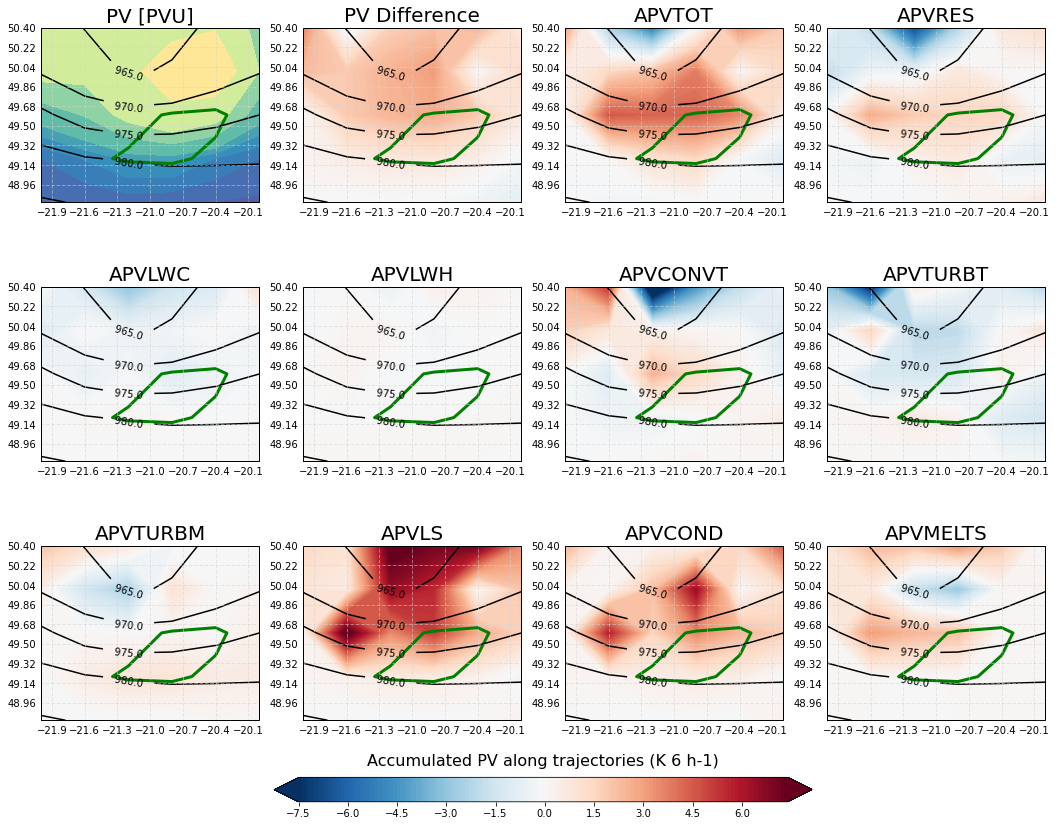

In [21]:
# IMPORT MODULES

import xarray as xr # for netcdf
import cartopy.crs as ccrs # cartopy plots
import cartopy.feature as cfeature # for adding features to plots
import numpy as np # for arrays
import matplotlib.pyplot as plt # for plots

%matplotlib inline

# Define a Cartopy 'ordinary' lat-lon coordinate reference system.
crs_latlon = ccrs.PlateCarree()

# Define a window for plotting
plonmin = -22
plonmax = -20
platmin = 48.5
platmax = 50.5
plev = 19

# Which resolution?
res='04'

# Integration period?
integr='6'

# NetCDF Files handles
f_APV = '/net/thermo/atmosdyn2/atroman/stingjet/tra_'+res+'/APV20140212_02_'+integr+'h.nc'
f_P = '/net/thermo/atmosdyn2/atroman/stingjet/cdf_'+res+'/P20140212_02'
f_S = '/net/thermo/atmosdyn2/atroman/stingjet/cdf_'+res+'/S20140212_02'

# APV-Files
d_APV = xr.open_dataset(f_APV).sel(lat=slice(platmin,platmax),lon=slice(plonmin,plonmax),lev=plev) # use sel to only ready the lon / lat that you really need!!!
# Read coordinates
lon_APV, lat_APV = d_APV.lon.values, d_APV.lat.values
# Read data
PV_DIFF, APVTOT, APVRES, APVLS, APVLWC, APVLWH  = d_APV.PV_DIFF.values, d_APV.APVTOT.values, d_APV.APVRES.values, d_APV.APVLS.values, d_APV.APVLWC.values, d_APV.APVLWH.values
APVCONVT, APVTURBT, APVTURBM, APVCOND, APVMELTS = d_APV.APVCONVT.values, d_APV.APVTURBT.values, d_APV.APVTURBM.values, d_APV.APVCOND.values, d_APV.APVMELTS.values

# P-Files
d_P = xr.open_dataset(f_P).sel(lat=slice(platmin,platmax),lon=slice(plonmin,plonmax),lev=plev)
lon_P, lat_P, SLP_P = d_P.lon.values, d_P.lat.values, d_P.SLP.values[0,0,:,:]

U = d_P.U.values[0,:,:]
V = d_P.V.values[0,:,:]

WIND = np.sqrt(U**2+V**2)

# S-Files
#d_S = xr.open_dataset(f_S)
#d_S

d_S = xr.open_dataset(f_S).sel(lat=slice(platmin,platmax),lon=slice(plonmin,plonmax),lev=plev)
PV = d_S.PV.values[0,:,:]

# Get an overview over dataset by simply typing
#data_APV

#print(APVTOT.shape)

# Generate figure
fig, axes = plt.subplots(3, 4, subplot_kw=dict(projection=ccrs.PlateCarree()))
#fig = plt.figure()

# Define figure size
fig.set_figheight(15)
fig.set_figwidth(18)

# Add projection and land-masks
#ax = plt.axes(projection=ccrs.PlateCarree())
#

# Plotting levels
PV_levels=(-0.1,0,0.2,0.4,0.6,0.8,1,1.5,2,3,5,7)
APV_levels=np.arange(-7.5,7.5,0.1)

# PV Plot
filled_PV  = axes[0,0].contourf(lon_P,lat_P,PV,levels=PV_levels,cmap="Spectral_r",transform=crs_latlon) # who has a sexy PV colormap?
axes[0,0].set_title("PV [PVU]",size=20)

# PV-DIFF
filled_PV = axes[0,1].contourf(lon_APV,lat_APV,PV_DIFF[0,:,:],levels=APV_levels,cmap="RdBu_r",transform=crs_latlon)
axes[0,1].set_title("PV Difference",size=20)

# APV TOT
filled_PV = axes[0,2].contourf(lon_APV,lat_APV,APVTOT[0,:,:],levels=APV_levels,cmap="RdBu_r",transform=crs_latlon,extend="both")
axes[0,2].set_title("APVTOT",size=20)

# RESID
filled_PV = axes[0,3].contourf(lon_APV,lat_APV,APVRES[0,:,:],levels=APV_levels,cmap="RdBu_r",transform=crs_latlon,extend="both")
axes[0,3].set_title("APVRES",size=20)

# APVLWC
filled_PV = axes[1,0].contourf(lon_APV,lat_APV,APVLWC[0,:,:],levels=APV_levels,cmap="RdBu_r",transform=crs_latlon,extend="both")
axes[1,0].set_title("APVLWC",size=20)

# APVLWH
filled_PV = axes[1,1].contourf(lon_APV,lat_APV,APVLWH[0,:,:],levels=APV_levels,cmap="RdBu_r",transform=crs_latlon,extend="both")
axes[1,1].set_title("APVLWH",size=20)

# APVCONVT
filled_PV = axes[1,2].contourf(lon_APV,lat_APV,APVCONVT[0,:,:],levels=APV_levels,cmap="RdBu_r",transform=crs_latlon,extend="both")
axes[1,2].set_title("APVCONVT",size=20)

# APVTURBT
filled_PV = axes[1,3].contourf(lon_APV,lat_APV,APVTURBT[0,:,:],levels=APV_levels,cmap="RdBu_r",transform=crs_latlon,extend="both")
axes[1,3].set_title("APVTURBT",size=20)

# APVTURBM
filled_PV = axes[2,0].contourf(lon_APV,lat_APV,APVTURBM[0,:,:],levels=APV_levels,cmap="RdBu_r",transform=crs_latlon,extend="both")
axes[2,0].set_title("APVTURBM",size=20)

# APVLS
filled_PV = axes[2,1].contourf(lon_APV,lat_APV,APVLS[0,:,:],levels=APV_levels,cmap="RdBu_r",transform=crs_latlon,extend="both")
axes[2,1].set_title("APVLS",size=20)

# APVCOND
filled_PV = axes[2,2].contourf(lon_APV,lat_APV,APVCOND[0,:,:],levels=APV_levels,cmap="RdBu_r",transform=crs_latlon,extend="both")
axes[2,2].set_title("APVCOND",size=20)

# APVMELTS
filled_PV = axes[2,3].contourf(lon_APV,lat_APV,APVMELTS[0,:,:],levels=APV_levels,cmap="RdBu_r",transform=crs_latlon,extend="both")
axes[2,3].set_title("APVMELTS",size=20)


# This is how I would like to add common stuff, but doesn not work whatsoever....
# Add comon stuff
#for ax in axes.flat:
    #ax.add_feature(cfeature.LAND,color="lightgray")
 #   ax.clabel(lines_wind,colors=['black'],manual=False,inline=True,fmt=' {:.1f} '.format)  
         
# Add common stuff        
for ax in axes.flat:
    ax.contour(lon_P,lat_P,WIND,levels=[53],colors="green",linewidths=3,transform=crs_latlon)
    #ax.clabel(lines_wind,colors=['black'],manual=False,inline=True,fmt=' {:.1f} '.format)
    lines_slp=ax.contour(lon_P,lat_P,SLP_P,levels=np.arange(960,1000,5),colors="black",transform=crs_latlon)
    ax.clabel(lines_slp,colors=['black'],manual=False,inline=True,fmt=' {:.1f} '.format)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='LightGray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
        
# Combined colorbar
#fig.colorbar(filled_PV, orientation='horizontal')
cbar=fig.colorbar(filled_PV, ax=axes.ravel().tolist(),orientation='horizontal',extend='both',fraction=0.03, pad=0.07)
cbar.set_label(label='Accumulated PV along trajectories (K '+integr+' h-1)', size=16, labelpad=-65)

# Save figure to disk
fig.savefig('PV_plot_'+res+'_'+integr+'h_l'+str(plev)+'.png',bbox_inches='tight')

#lines_wind = axes[0,0].contour(lon_P,lat_P,WIND,levels=[50,55],colors="black",transform=crs_latlon)
#lines_slp = axes[0,0].contour(lon_P,lat_P,SLP_P,levels=np.arange(960,1000,5),cmap="gist_yarg_r",transform=crs_latlon)
#axes[0,0].clabel(lines_slp,colors=['black'],manual=False,inline=True,fmt=' {:.1f} '.format)
